### 선형회귀와 경사하강법의 학습 방법  
  
경사하강법 : 모델의 최적화된 방법을 찾도록 도움을 주는 것(머신러닝이나 딥러닝 모델은 아님.)    
가중치와 절편을 이용해 최적화된 모델을 찾아주는것 = 경사하강법 + 선형회귀   
SGD(Stochastic Gradient Descent)가 가중치와 절편을 이용해 오차(절대값이나 제곱값)를 줄여야 정답에 가까워진다.  


    

## 선형회귀식의 가중치(w)와 절편(bias) => Y = wX + b

머신러닝/딥러닝의 학습이란? 데이터를 계속 업데이트 하면서 모델을 적용하면서 오차가 가장 적은 것을 기준으로 가중치와 절편을 찾는것.  
규칙이란? 가중치와 절편을 업데이트 하는것  
규제란 ? 과대적합을 방지하기 위해 가중치와 절편을 줄이는 것  


### 당뇨병환자 데이터

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [222]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [223]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


> data 는 442 X 10 크기의 2차원배열 Traget 은 442개의 요소를 가진 1차원 배열이다.  
즉 442개의 샘플과 10개의 Feature로 구성되어 있다.

In [224]:
# 입력 데이터 보기 : 앞에서 3개만 보기
diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [225]:
# 타깃 데이터 보기(앞에서 3개만)
diabetes.target[:3]

array([151.,  75., 141.])

### 컬럼의 의미
- age : 환자의 나이
- sex : 성?별
- bmi : 체질량지수
- bp : 평균혈압
- s1 : 혈청 수치1(HDL 콜레스테롤 수치)
- s2 : 혈청 수치2(LDL 콜레스테롤 수치)
- s3 : 혈청 수치3(총 콜레스테롤 수치)
- s4 : 혈청 수치4(혈청 트리그리세리드 수치)
- s5 : 혈청 수치5(혈당 수치)
- s6 : 혈청 수치6(기타 혈액 측정 수치..?)  

: 1년 후 당뇨병 진행 상황을 수치화 한 것

### 당뇨병 환자 데이터 시각화

In [226]:
import matplotlib.pyplot as plt

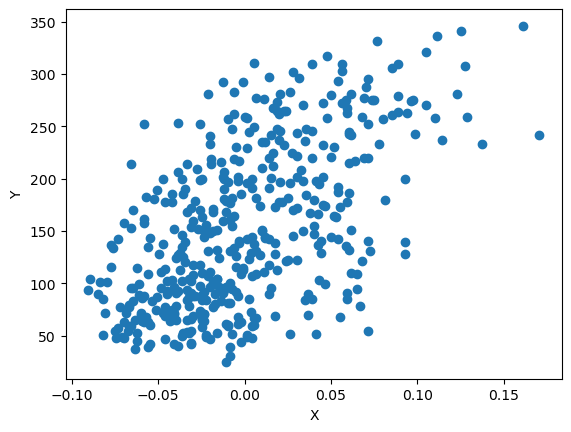

In [227]:
plt.scatter(
    x=diabetes.data[:,2],
    y=diabetes.target,

)

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

> x축은 diabetes의 3번째 특성(bmi)이고 y축은 diabetes.target입니다.  
이 그래프륿 보면 세번째 특성과 타깃 사이에 정비례 관계가 있음을 알 수 있습니다.

---
### 경사하강법으로 학습하는 방법
: 산점도로 표현되었을때 산점도의 기울기를 가장 잘 표현하는 직선의 수식을 찾는 방법.  
모델이 데이터를 잘 표현할수있도록 기울기(변화율, Gradient)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘.

### 예측값으로 올바른 모델 찾기
- 훈련데이터에 잘 맞는 w와 b를 찾는 방법(Y^ = wX + b)  
(1) 무작위로 w와 b를 정한다.  
(2) x에서 샘플 하나를 선택하여 Y^을 계산한다.  
(3) Y^과 선택한 sample의 진짜 Y를 비교한다.  (예측값과 정답 비교하기)  
(4) Y^과 Y가 더 가까워지도록 w와 b를 조정한다.  (모델 조정)  
(5) 모든 샌플을 처리할때 까지 다시 (2)~(4)를 반복한다.

In [228]:
# 데이터 준비하기
x = diabetes.data[:,2]
y = diabetes.target

In [229]:
# 훈련 데이터에 맞는 w와 b를 찾기 위해 w와 b를 초기화

w = 1.0
b = 1.0

In [230]:
# 훈련데이터의 첫번째 샘플 데이터로 y^ 계산하기

y_hat = w*x[0] + b
y_hat

1.0616962065186832

In [231]:
# abs(y[0] - y_hat[0])

> 실제값과 예측값의 차이가 많이 발생합니다.

In [232]:
# 실제값 가까워지기 위해 w와 b를 조금씩 변경해서 y_hat이 증가하는지 감소하는지 파악
# w를 0.1만큼 증가하자.

w_inc = w + 0.1

y_hat_inc = w_inc * x[0] + b
y_hat_inc

1.0678658271705517

> 첫번째 보다는 실제값에 조금 더 접근했습니다.

In [233]:
# w값을 조정한 후 예측값 증가 정도 확인하기
# w_rate = abs(x[0] *(w - w_inc))
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.06169620651868429

> w_rate를 변화율이라 한다.  
변화율은 결국 훈련데이터의 첫번째 샘플인 x[0]이다.

---
### 변화율(Gradient, 경사, 기울기)로 가중치 및 절편 업데이트 하기

In [234]:
w_new = w + w_rate
w_new

1.0616962065186843

In [235]:
# b를 0.1만큼 증가시킨 후 변화율로 절편 업데이트하기

b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(int(b_rate))

1.1616962065186833
1


> 변화율이 1입니다. 즉 b가 1증가하면 y_hat도 1만큼 증가합니다.  
단순히 생각하면 b가 1 증가하면 그래프의 위치가 y방향으로 1만큼 올라갑니다.  
즉, b를 업데이트 하기 위해서는 변화율이 1이므로 단순히 1을 더하면 됩니다.

In [236]:
b_new = b + 1
b_new

2.0

---
### 오차 역전파(back propagation)로 가중치와 절편을 더 적절하게 업데이트 하기  
: 가중치와 절편을 더욱 적절하게 업데이트 하는 방법  
- 오차와 변화율을 곱하여 가중치를 업데이트 하기

In [237]:
# x[0]일때 w의 변화율과 b의 변화울에 오차를 곱한다.
err = y[0] - y_hat

w_new = w + w_rate * err #  변화율에 오차를 곱한다.
b_new = b + 1 * err

print(w_new, b_new)

10.250624555903848 150.9383037934813


In [238]:
# 두번째 샘플 x[1]을 사용하여 오차를 구하고 새로운 w와 b를 구한다.

y_hat = x[1] * w_new + b_new

err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new,b_new)

14.132317616380695 75.52764127612656


In [239]:
# 3번째 샘플 x[2]를 사용하여 오차를 구하고 새로운 w와 b를 구한다.
y_hat = x[2] * w_new + b_new

err = y[2] - y_hat
w_rate = x[2]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new,b_new)

17.014719208776086 140.3718013346938


### 전체 샘플을 반복하기

In [266]:


lr = 1

w_new = 1
b_new = 1
for i in range(1000):
    for a_i, b_i in zip(x, y):

        y_hat = a_i * w_new + b_new

        err = b_i - y_hat

        # if err != 0:
        #     err = 1 if err>0 else -1

        w_rate = a_i

        w_new = w_new + err * w_rate * lr
        b_new = b_new + err * lr
        # print(b_new)


In [267]:
print(w_new, b_new)

913.5973364346786 123.39414383177173


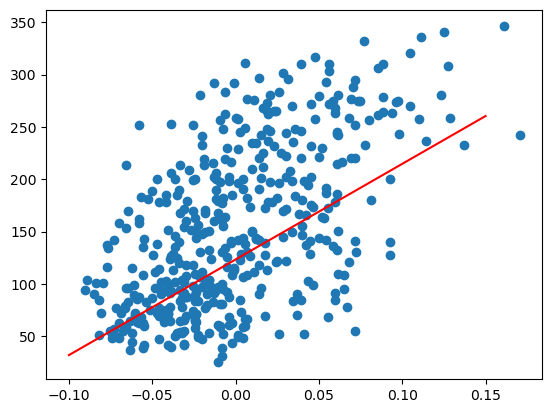

In [268]:
plt.scatter(x,y)

pt1 = (-0.1, -0.1 * w_new + b_new)
pt2 = (0.15, 0.15 * w_new + b_new)


plt.plot(
    [pt1[0], pt2[0]],
    [pt1[1], pt2[1]],
    c = 'red'
)

y^ = 1126.9 * x + 151

In [269]:
# 예측 해보기

x_new = 0.18
y_pred = x_new * w_new + b_new
y_pred

287.8416643900139

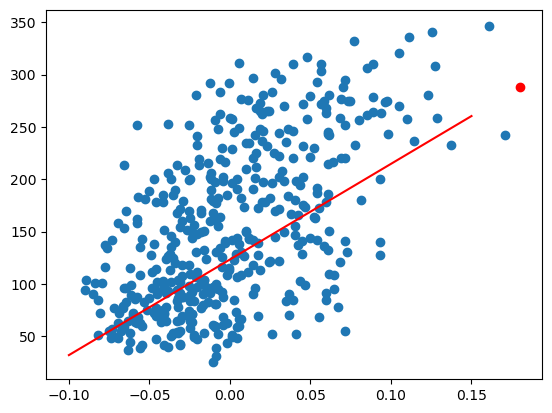

In [270]:
plt.scatter(x,y)

pt1 = (-0.1, -0.1 * w_new + b_new)
pt2 = (0.15, 0.15 * w_new + b_new)


plt.plot(
    [pt1[0], pt2[0]],
    [pt1[1], pt2[1]],
    c = 'red'
)

plt.scatter(x_new, y_pred, c = 'red')

---
### 손실함수와 경사하강법
### 손실함수
- 예상한 값과 실제 값의 차이를 함수로 정의한 것
- 손실함수의 차이를 줄이는 방법으로 사용한게 경사하강법
- 회귀, 분류등에서 널리 사용하는 손실함수가 있다.
- 복잡한 다른 문제에서는 자신만의 손실함수를 정의하여 사용하기도 합니다.
#### 회귀의 손실함수
- 제곱오차(Squared Error)를 사용
: 타깃값과 예측값을 뺀 다음 제곱한 것이다.(음수가 발생할 수 있으므로)  
$SE = (y - \hat{y})^2$ =====> 즉, 경사하강법은 손실함수의 기울기가 적은쪽으로 이동하는 알고리즘

In [245]:
# x = np.linspace(0, 1, 150)
# y = x * 3 + 5

In [ ]:
lr = 1

w_new = 1
b_new = 1
for i in range(100):
    for a_i, b_i in zip(x, y):
        i
        y_hat = a_i * w_new + b_new

        err = b_i - y_hat

        if err != 0:
            err = 1 if err>0 else -1
        else:
            flag = True
            break

        w_rate = a_i

        w_new = w_new + err * w_rate * lr
        b_new = b_new + err * lr
        # print(b_new)

In [247]:
print(w_new, b_new)

1126.8440276550286 151


---
### 선형회귀 노드 만들기

In [ ]:
class LRNode:
    
    def __init__(self, lr = 1, loss = 'mse'):
        self.lr = lr
        self.loss = loss.lower()
        self.w = 1
        self.b = 1

    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat

    def backpass(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad

    
    def fit(self, x, y, epochs = 100):
        lr = self.lr
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = y_i - y_hat
                if self.loss == 'mae':
                    if err != 0:
                        err = 1 if err>0 else -1
                w_grad, b_grad = self.backpass(x_i, err)
                self.w += w_grad
                self.b += b_grad
        return self.w, self.b

In [281]:
# 사용하기
node = LRNode()
w, b = node.fit(x, y, epochs = 100)
print(w, b)

913.5973364346786 123.39414383177173
